# Perceptron

Perception is one of the earliest forms of Artificial Neural Networks. Developed in 1957, by Frank Rosenblatt, the Perceptron is very simple (compared to more current concepts). It uses a *threshold logic unit* (TLU). This artificial neuron takes has numerical inputs and outputs (instead of binary) and each input connection is assosciated with a weight. The TLU computes a weighted sum of its inputs   
($z = w_1x_1 + w_2x_2 + ... + w_{n}x_{n} = x^Tw$), then applies a *step function* to that sum and outputs the result:  
$h_w(x) = step(z)$, where $z = x^Tw$.

![Threshold Logic Unit](image.png)  
*Threshold Logic Unit*

The most common step function used in Perceptrons is the *Heaviside step function*, but sometimes the sign function is also used.

\begin{equation*}
\text{heaviside} (z) =
\begin{cases}
    0 \ \text{if} \ z \lt 0\\
    1 \ \text{if} \ z \geq 0
\end{cases} \quad
\text{sgn} (z) =
\begin{cases}
    &{-1} \ &\text{if} \ z \lt 0\\
    & 0 \ &\text{if} \ z = 0\\
    &+1 \ &\text{if} \ z \gt 0
\end{cases}
\end{equation*}

Training the TLU in this case means finding the right values for $\bold{\it{w}}$.

![Perceptron Diagram](image-1.png)

## Neural Activity

**In the description of the process and the practical examples below, we will assume $x \in \R^2$ and utilize the activation function of $\text{sign}(z)$. Furthermore, this is a single-layer perceptron which can only separate data into 2 distinct classes.**

The pre-activation process begins (initially) by arbitrarily setting the weights (to a zero vector $\overline{0}$ for example); in each progressive step, the weights will be updated and used. Next, take the linear combination of the weights, $\overline{w}$ (inlcuding an extra element $w_0$ to represent the bias $b$) and the corresponding feature values $\overline{x}$ (including an extra column of 1 to account for the bias $b$). This will provide $z$ which we can then apply to our activation function, e.g. $\text{sign}(z)$ or $\text{heaviside}(z)$:

\begin{equation*}
    z = \overline{w}^T\overline{x}^{(i)}
\end{equation*}

Next, the prediction is made based on the value of $z$. It can be 1 of 3 outcomes:

$$\begin{align}
    {-1}& \ &\text{if} \ z \lt 0\\
    0& \ &\text{if} \ z = 0\\
    +1& \ &\text{if} \ z \gt 0
\end{align}$$

The update formula for the new weights $\overline{w}$ is calculated with (the hyperparameter) $\eta$, the current row $x^{(i)}$, the predicted classification/label $\hat{y}^{(i)}$, the actual classification/label $y$, and the current/old weights $\overline{w}$:

$$
    \overline{w} := \overline{w} - \eta \cdot \left(\hat{y}^{(i)} - y \right) \cdot \overline{x}
$$

Obviously, the prediction is either correct or incorrect. Let's examine when the prediction is correct.

+ The prediction correctly guessed 1:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(1 - 1\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(0\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - 0 \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} 
$$

+ The prediction correctly guessed -1:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(-1 - (-1)\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(0\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - 0 \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} 
$$

In both cases, the weights were accurate enough to provide a correct prediction, so they shouldn't yet be changed. Now, we can examine the three cases of of an incorrect prediction.

+ The prediction incorrectly guessed 1:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(1 - 1\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(0\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - 0 \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} 
$$

+ The prediction incorrectly guessed -1:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(-1 - (-1)\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(0\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - 0 \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} 
$$

+ The prediction incorrectly guessed 0:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(-1 - (-1)\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(0\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - 0 \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} 
$$

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

Randomly generating 100 points from $x \in [-50,50]$ and $y \in [-50,50]$ to create 100 random points in 2 distinct clusters

In [17]:
def round_cluster(center, radius, num_points, cluster_label):
    h, k = center
    theta = np.random.uniform(0, 2*np.pi, num_points)
    r = np.sqrt(np.random.uniform(0, 1, num_points)) * radius
    x = r * np.cos(theta) + h
    y = r * np.sin(theta) + k
    x = np.round(x,1)
    y = np.round(y,1)
    labels = np.full(num_points, cluster_label)
    return x, y, labels

center1 = (-25, 25)
center2 = (25, -25)
radius = 25
num_points = 100

x1, y1, labels1 = round_cluster(center1, radius, num_points, 1)
x2, y2, labels2 = round_cluster(center2, radius, num_points, 2)

x_coords = np.concatenate([x1, x2])
y_coords = np.concatenate([y1, y2])
labels = np.concatenate([labels1, labels2])

df = pd.DataFrame({"x" : x_coords, "y" : y_coords, "label" : labels})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


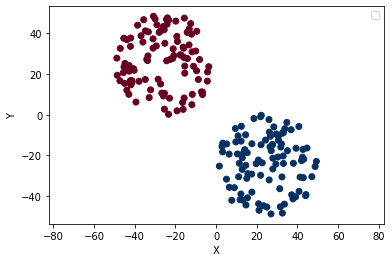

In [18]:
plt.scatter(df["x"], df["y"], c=df["label"], cmap = "RdBu")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')  # Set equal scaling for a more accurate representation
plt.show()

In [19]:
df

,x,y,label
0,-34.1,27.2,1
1,-25.4,2.7,1
2,-14.1,27.6,1
3,-25.2,35.1,1
4,-27.3,15.1,1
...,...,...,...
195,11.4,-23.9,2
196,44.0,-39.8,2
197,32.6,-48.4,2
198,3.3,-14.0,2


In [20]:
class Perceptron(object):
    def __init__(self, eta = 0.5, epochs = 100) -> None:
        self.epochs = epochs
        self.eta = eta
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.b = np.random.rand(1)

        self.errors = []

        for _ in range(self.epochs):
            errors = 0
            for i, xi in enumerate(X):
                update = self.eta * (self.predict(xi) - y[i])
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
        
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2])
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)   


In [21]:
X = df[["x","y"]].to_numpy()
y = np.where(df['label'] == 1, 1, -1)

In [22]:
percept = Perceptron()

percept.fit(X,y)

C:\Users\Josh\AppData\Local\Temp\ipykernel_11436\3911486117.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors = errors + int(update != 0)


In [23]:
y_pred = percept.predict(X).reshape(200)
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

<AxesSubplot:>

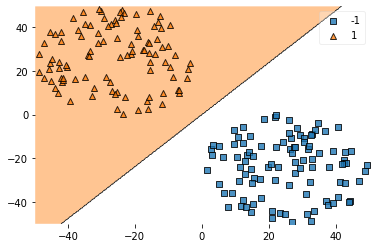

In [24]:
plot_decision_regions(X, y, clf = percept)

In [25]:
percept.w

array([[-33.23795735],
       [ 28.0445494 ]])

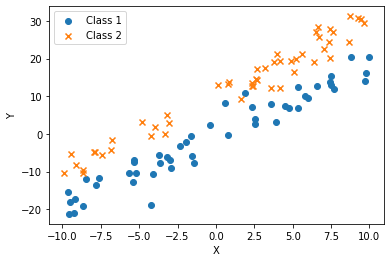

In [26]:
num_points = 50

# Generate random points for class 1
class1_x = np.random.uniform(-10, 10, num_points)
class1_y = 2 * class1_x + np.random.normal(0, 3, num_points)

# Generate random points for class 2
class2_x = np.random.uniform(-10, 10, num_points)
class2_y = 2 * class2_x + 10 + np.random.normal(0, 3, num_points)

# Concatenate the points and labels
x = np.concatenate([class1_x, class2_x])
y = np.concatenate([class1_y, class2_y])
labels = np.concatenate([np.ones(num_points), -np.ones(num_points)])

# Shuffle the data
indices = np.arange(2 * num_points)
np.random.shuffle(indices)
x = x[indices]
y = y[indices]
labels = labels[indices]

# Plot the points
plt.scatter(class1_x, class1_y, label='Class 1', marker='o')
plt.scatter(class2_x, class2_y, label='Class 2', marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_11436\3911486117.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors = errors + int(update != 0)


<AxesSubplot:>

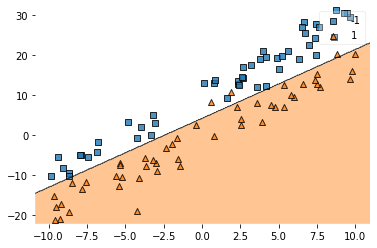

In [27]:
df = pd.DataFrame({"x" : x, "y" : y, "class" : labels})
X = df[["x","y"]].to_numpy()
y = df["class"].to_numpy().astype(int)
percept.fit(X,y)
y_pred = percept.predict(X).reshape(len(X))

plot_decision_regions(X,y, percept)

In [28]:
y_pred == y

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [29]:
percept.w

array([[ 96.93380132],
       [-56.10495085]])